# Predicting Tennis Match Results: Exploratory Data Analysis

## Notebook by Lauren Dellon

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file

## Load Data

In [2]:
tennis_all = pd.read_csv('../data/tennis_data_all.csv')
tennis_all.head()

,name,tourney_year,age,rank_points,rank,bpFaced,bpSaved,SvGms,2ndWon,1stWon,1stIn,svpt,df,ace,outcome,hand_R
0,Denis Kudla,2018,26.0,810.0,63.0,4.0,4.0,17.0,26.0,58.0,73.0,117.0,4.0,8.0,1,1
1,John Millman,2018,29.0,1083.0,38.0,5.0,3.0,15.0,15.0,49.0,68.0,98.0,2.0,8.0,1,1
2,Grigor Dimitrov,2018,27.0,1835.0,19.0,7.0,6.0,10.0,12.0,37.0,43.0,76.0,6.0,9.0,1,1
3,Yasutaka Uchiyama,2018,26.0,275.0,185.0,0.0,0.0,11.0,10.0,39.0,43.0,58.0,0.0,12.0,1,1
4,Jeremy Chardy,2018,31.0,1050.0,40.0,3.0,2.0,15.0,21.0,40.0,52.0,87.0,4.0,15.0,1,1


In [3]:
tennis_numeric = pd.read_csv('../data/tennis_data_numeric.csv')
tennis_numeric.head()

,age,rank_points,rank,bpFaced,bpSaved,SvGms,2ndWon,1stWon,1stIn,svpt,df,ace,hand_R,outcome
0,26.0,810.0,63.0,4.0,4.0,17.0,26.0,58.0,73.0,117.0,4.0,8.0,1,1
1,29.0,1083.0,38.0,5.0,3.0,15.0,15.0,49.0,68.0,98.0,2.0,8.0,1,1
2,27.0,1835.0,19.0,7.0,6.0,10.0,12.0,37.0,43.0,76.0,6.0,9.0,1,1
3,26.0,275.0,185.0,0.0,0.0,11.0,10.0,39.0,43.0,58.0,0.0,12.0,1,1
4,31.0,1050.0,40.0,3.0,2.0,15.0,21.0,40.0,52.0,87.0,4.0,15.0,1,1


In [4]:
# Ensure all variables are numeric in tennis_numeric
tennis_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86230 entries, 0 to 86229
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          86230 non-null  float64
 1   rank_points  86230 non-null  float64
 2   rank         86230 non-null  float64
 3   bpFaced      86230 non-null  float64
 4   bpSaved      86230 non-null  float64
 5   SvGms        86230 non-null  float64
 6   2ndWon       86230 non-null  float64
 7   1stWon       86230 non-null  float64
 8   1stIn        86230 non-null  float64
 9   svpt         86230 non-null  float64
 10  df           86230 non-null  float64
 11  ace          86230 non-null  float64
 12  hand_R       86230 non-null  int64  
 13  outcome      86230 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 9.2 MB


## Explore histograms

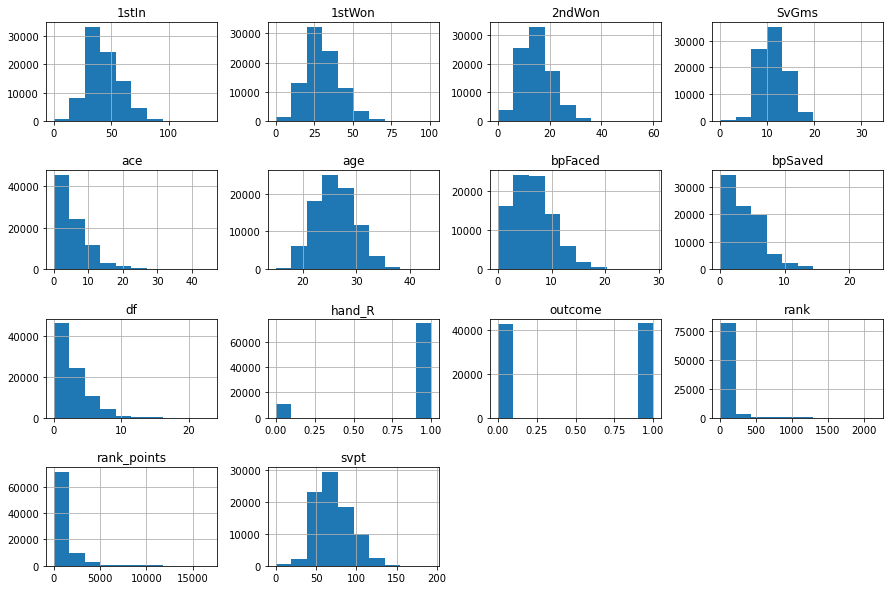

In [5]:
tennis_numeric.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Based on the statistics and the histograms, there don't appear to be any outliers that seem unreasonable. Outcome appears to be split approximately evenly, which makes sense since each initial row had both a winner and a loser. (But we dropped some rows where the hand was 'U'). The rank and rank_points are distributed mostly on lower values, which makes sense considering lower ranked players would probably not be in the tournament. Some of the features have long right tails (ace, bpSaved, df, rank, rank_points), meaning some standardization will need to be done in the preprocessing stage.

## Explore heatmap

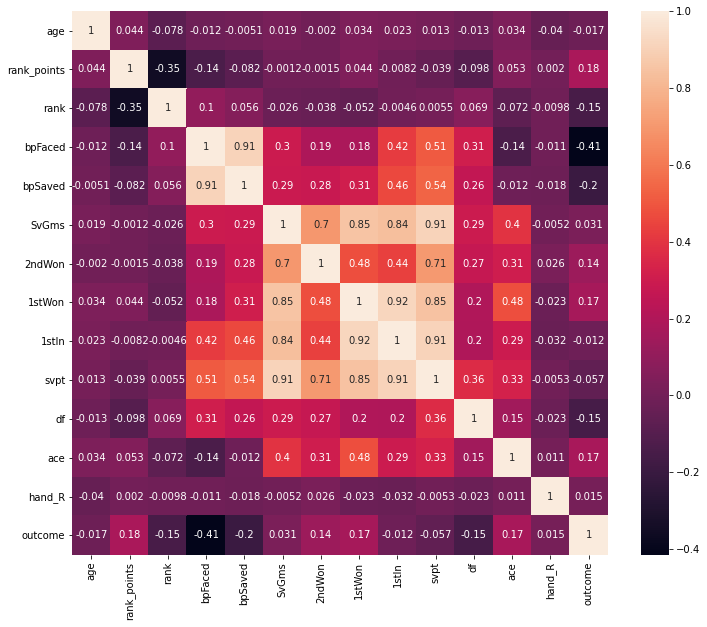

In [6]:
# Create a heatmap to show correlations in tennis_numeric
plt.subplots(figsize=(12,10))
sns.heatmap(tennis_numeric.corr(),annot=True)

We see that many of the features are highly correlated. We can plot these features to visualize these correlations.

## Explore highly correlated variables

### Break points faced (bpFaced) vs. Break points saved (bpSaved)

Text(0.5, 1.0, 'Break points faced vs. Break points saved')

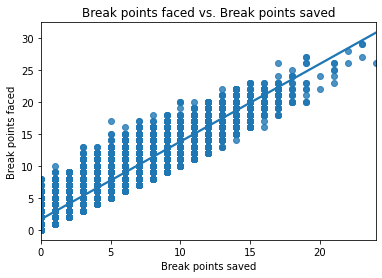

In [7]:
sns.regplot(x='bpSaved',y='bpFaced',data=tennis_numeric)
plt.xlabel('Break points saved')
plt.ylabel('Break points faced')
plt.title('Break points faced vs. Break points saved')

### 2nd serve points won (2ndWon) vs. Service games (SvGms)

Text(0.5, 1.0, '2nd Serve Points Won vs. Service Games')

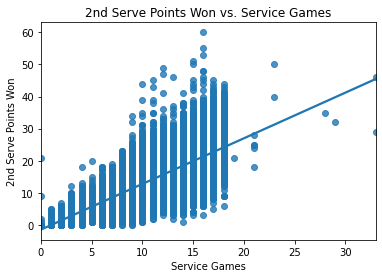

In [8]:
sns.regplot(x='SvGms',y='2ndWon',data=tennis_numeric)
plt.xlabel('Service Games')
plt.ylabel('2nd Serve Points Won')
plt.title('2nd Serve Points Won vs. Service Games')

### 1st serve points won (1stWon) vs. Service games (SvGms)

Text(0.5, 1.0, '1st Serve Points Won vs. Service Games')

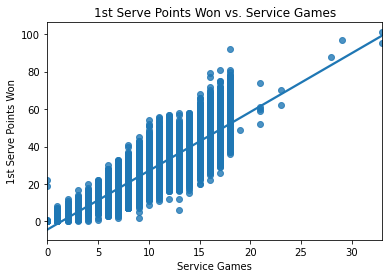

In [9]:
sns.regplot(x='SvGms',y='1stWon',data=tennis_numeric)
plt.xlabel('Service Games')
plt.ylabel('1st Serve Points Won')
plt.title('1st Serve Points Won vs. Service Games')

### 1st serves in (1stIn) vs. Service games (SvGms)

Text(0.5, 1.0, '1st Serve Points In vs. Service Games')

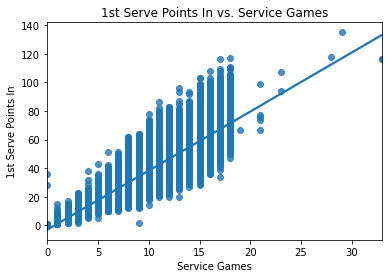

In [10]:
sns.regplot(x='SvGms',y='1stIn',data=tennis_numeric)
plt.xlabel('Service Games')
plt.ylabel('1st Serve Points In')
plt.title('1st Serve Points In vs. Service Games')

### Number of serve points (svpt) vs. Service games (SvGms)

Text(0.5, 1.0, 'Number of Serve Points vs. Service Games')

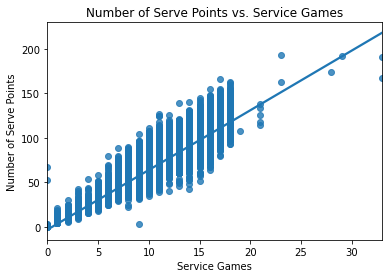

In [11]:
sns.regplot(x='SvGms',y='svpt',data=tennis_numeric)
plt.xlabel('Service Games')
plt.ylabel('Number of Serve Points')
plt.title('Number of Serve Points vs. Service Games')

### 1st serve points in (1stIn) vs. 1st serve points won (1stWon)

Text(0.5, 1.0, '1st Serve Points In vs. 1st Serve Points Won')

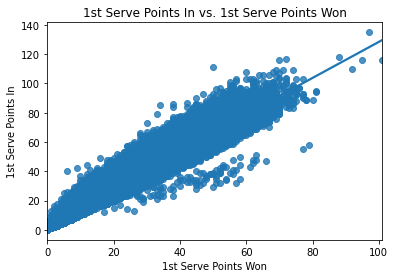

In [12]:
sns.regplot(x='1stWon',y='1stIn',data=tennis_numeric)
plt.xlabel('1st Serve Points Won')
plt.ylabel('1st Serve Points In')
plt.title('1st Serve Points In vs. 1st Serve Points Won')

### 2nd serve points won (2ndWon) vs. Number of serve points (svpt)

Text(0.5, 1.0, '2nd Serve Points Won vs. Number of Serve Points')

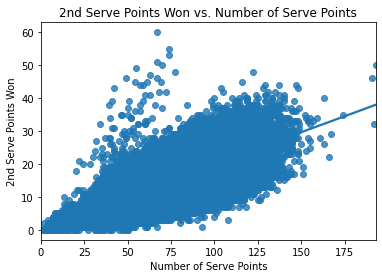

In [13]:
sns.regplot(x='svpt',y='2ndWon',data=tennis_numeric)
plt.xlabel('Number of Serve Points')
plt.ylabel('2nd Serve Points Won')
plt.title('2nd Serve Points Won vs. Number of Serve Points')

### 1st serve points won (1stWon) vs. Number of serve points (svpt)

Text(0.5, 1.0, '1st Serve Points Won vs. Number of Serve Points')

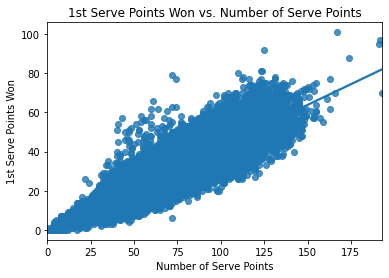

In [14]:
sns.regplot(x='svpt',y='1stWon',data=tennis_numeric)
plt.xlabel('Number of Serve Points')
plt.ylabel('1st Serve Points Won')
plt.title('1st Serve Points Won vs. Number of Serve Points')

### 1st serve points in (1stIn) vs. Number of serve points (svpt)

Text(0.5, 1.0, '1st Serve Points In vs. Number of Serve Points')

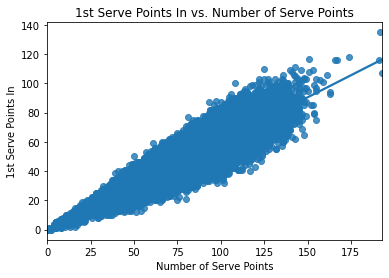

In [15]:
sns.regplot(x='svpt',y='1stIn',data=tennis_numeric)
plt.xlabel('Number of Serve Points')
plt.ylabel('1st Serve Points In')
plt.title('1st Serve Points In vs. Number of Serve Points')

## Boxplots

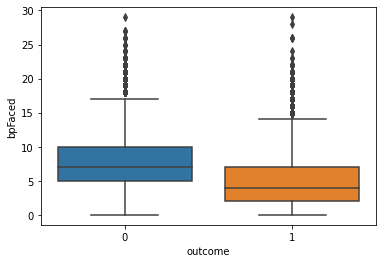

In [16]:
sns.boxplot(x='outcome',y='bpFaced',data=tennis_numeric)

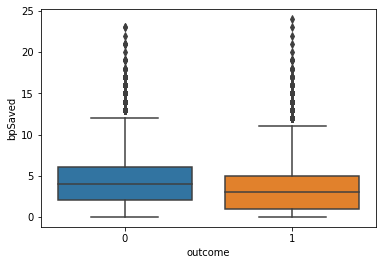

In [17]:
sns.boxplot(x='outcome',y='bpSaved',data=tennis_numeric)

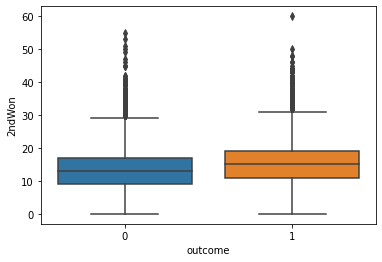

In [18]:
sns.boxplot(x='outcome',y='2ndWon',data=tennis_numeric)

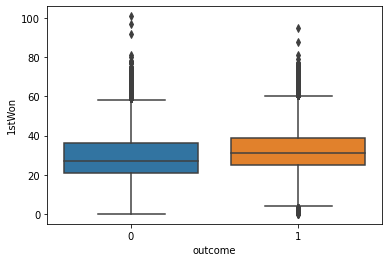

In [19]:
sns.boxplot(x='outcome',y='1stWon',data=tennis_numeric)

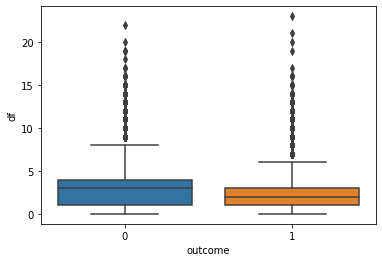

In [20]:
sns.boxplot(x='outcome',y='df',data=tennis_numeric)

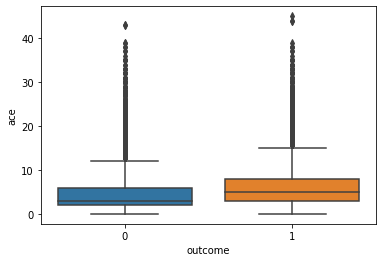

In [21]:
sns.boxplot(x='outcome',y='ace',data=tennis_numeric)